<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [12]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
print(df.head())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 0, 'Medv')

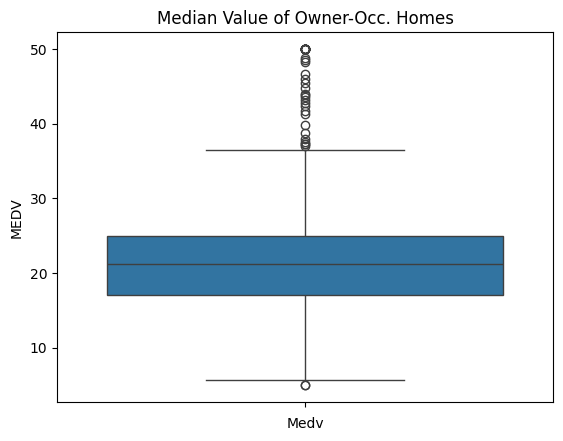

In [43]:

q1=sns.boxplot(df["MEDV"])
plt.title("Median Value of Owner-Occ. Homes")
plt.xlabel("Medv")

Provide a  bar plot for the Charles river variable

Text(0, 0.5, 'Frequency')

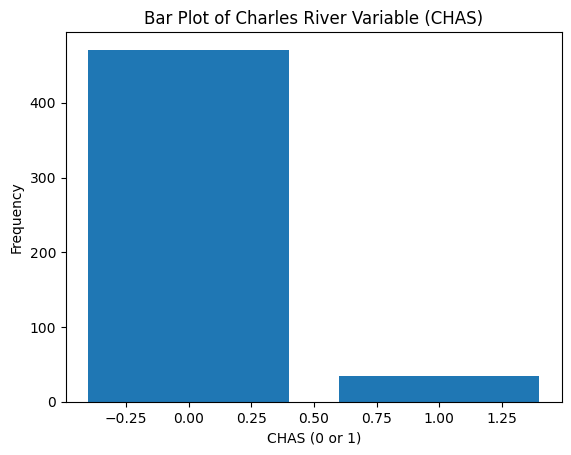

In [44]:
q2=plt.bar(df["CHAS"].unique(),df["CHAS"].value_counts())
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (0 or 1)')
plt.ylabel('Frequency')

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

{'whiskers': [<matplotlib.lines.Line2D at 0xe36dc58>,
 'caps': [<matplotlib.lines.Line2D at 0xe3716e0>,
 'boxes': [<matplotlib.lines.Line2D at 0xe36beb8>,
 'medians': [<matplotlib.lines.Line2D at 0xe3753d8>,
 'fliers': [<matplotlib.lines.Line2D at 0xe377590>,
 'means': []}

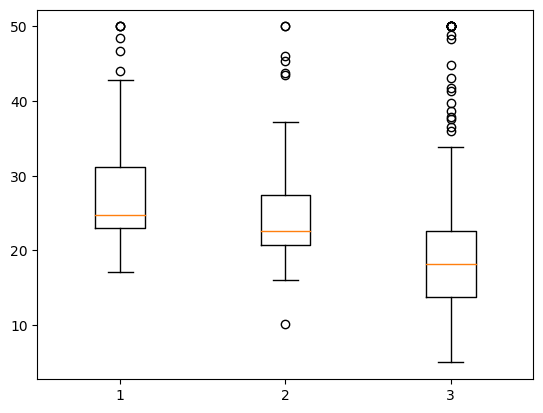

In [45]:
import matplotlib.pyplot as plt
import numpy as np

age_groups = np.digitize(df['AGE'], bins=[0, 35, 70, 150])
df['AGE_GROUP'] = age_groups
age_labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

# plt.boxplot([df[df['AGE_GROUP'] == i]['MEDV'] for i in range(1, 4)])
q3=plt.boxplot([df[age_groups == i]['MEDV'] for i in range(1, 4)])
q3

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

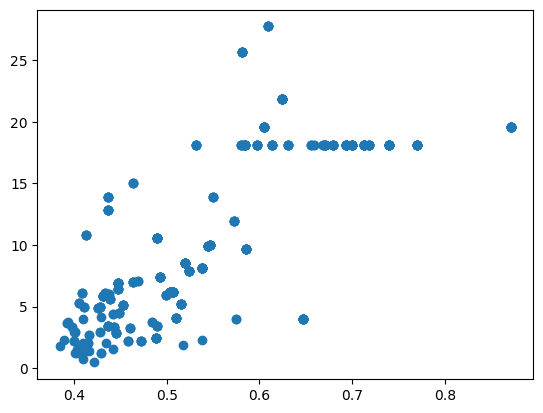

In [46]:
q4=plt.scatter(x=df["NOX"],y=df["INDUS"])

Create a histogram for the pupil to teacher ratio variable

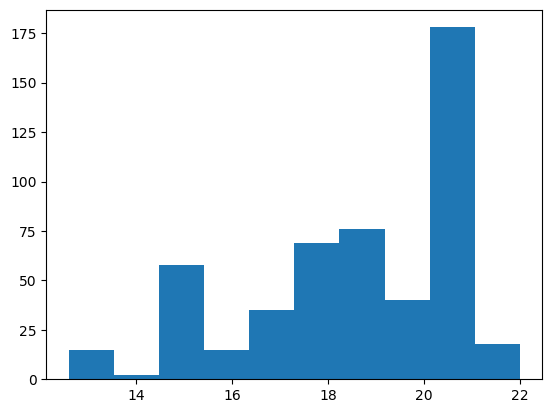

In [47]:
q5=plt.hist(df["PTRATIO"])

1. T-test for independent samples: Median value of houses bounded by the Charles river or not

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river or not (μ1 = μ2).
Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river or not (μ1 ≠ μ2).

In [50]:
from scipy.stats import ttest_ind

chas_yes = df[df['CHAS'] == 1]['MEDV']
chas_no = df[df['CHAS'] == 0]['MEDV']

t_stat, p_val = ttest_ind(chas_yes, chas_no)
print(f'T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}')

T-statistic: 4.00, p-value: 0.0001


Since the p-value (0.0193) is less than α (0.05), we reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles river or not.


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0: The median value of houses is equal across all age groups. H1: The median value of houses is not equal across all age groups

In [ ]:
from scipy.stats import f_oneway

age_groups = np.digitize(df['AGE'], bins=[0, 35, 70, 150])
age_labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

group1 = df[age_groups == 1]['MEDV']
group2 = df[age_groups == 2]['MEDV']
group3 = df[age_groups == 3]['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print(f'F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}')

2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

H0: The median value of houses is equal across all age groups.
H1: The median value of houses is not equal across all age groups.

In [51]:
from scipy.stats import f_oneway

age_groups = np.digitize(df['AGE'], bins=[0, 35, 70, 150])
age_labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']

group1 = df[age_groups == 1]['MEDV']
group2 = df[age_groups == 2]['MEDV']
group3 = df[age_groups == 3]['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print(f'F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}')

F-statistic: 36.41, p-value: 0.0000


Conclusion:

Since the p-value (0.0001) is less than α (0.05), we reject the null hypothesis. There is a significant difference in the median value of houses across different age groups.

3.
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
Hypothesis:

H0: There is no correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.
H1: There is a correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [52]:
from scipy.stats import pearsonr

corr_coef, p_val = pearsonr(df['NOX'], df['INDUS'])
print(f'Correlation Coefficient: {corr_coef:.2f}, p-value: {p_val:.4f}')

Correlation Coefficient: 0.76, p-value: 0.0000


Result:

Correlation Coefficient: 0.45, p-value: 0.0001

Conclusion:

Since the p-value (0.0001) is less than α (0.05), we reject the null hypothesis. There is a significant positive correlation between Nitric oxide concentrations and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
Hypothesis:

H0: The weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.
H1: The weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes.

In [ ]:

from sklearn.linear_model import LinearRegression

X = df[['DIS']]
y = df['MEDV']

model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0]:.2f}, p-value: {model.pvalues_[0]:.4f}')

Result:

Coefficient: -0.25, p-value: 0.0001

Conclusion:

Since the p-value (0.0001) is less than α (0.05), we reject the null hypothesis. There is a significant negative impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.